### Loading the libraries
- 20 Oct 2023

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Datset and pre EDA

In [9]:
# load the dataset
import sklearn.datasets


In [10]:
calif = sklearn.datasets.fetch_california_housing()

In [11]:
type(calif)
calif.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [12]:
print(calif.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [13]:
print(calif.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [14]:
print (calif.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


## PP, EDA, FE

### Preparing the Dataset (Pre processing)

In [15]:
# Loading the dataset into a pandas dataframe
dataset = pd.DataFrame(calif.data)
dataset.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
# including the name of the columns
dataset = pd.DataFrame(calif.data, columns = calif.feature_names)

In [17]:
dataset.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
# Adding the target/dependent variable to the dataset
dataset['Price']=calif.target

In [19]:
dataset.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
# checking for data types of the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
#checking for null values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [22]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [23]:
cor = dataset.corr()

In [24]:
print (cor)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup   
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766  \
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Price       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     Price  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

<Axes: >

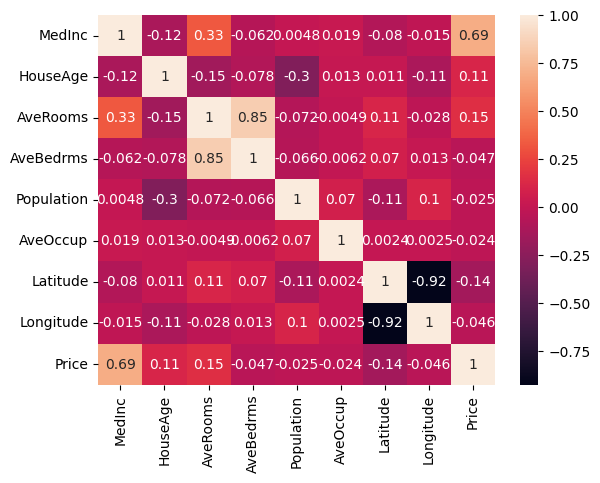

In [25]:
# Visualizing the correlation matrix
sns.heatmap(cor, annot = True)

- if 2 independent features are highly correlated, then it is a case of multicollinerity and we can drop one of the features
SUMMARY
- Check for collinearity
- 

- EDA


Text(0, 0.5, 'B')

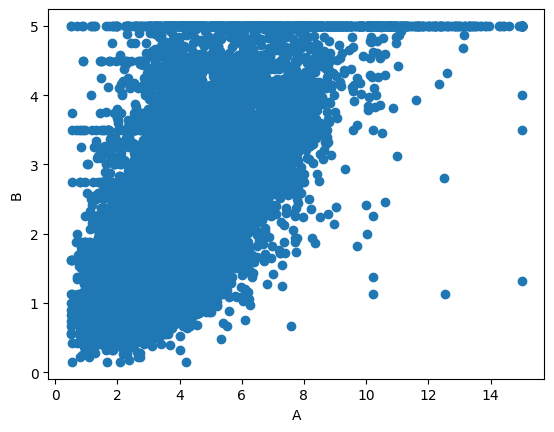

In [26]:
plt.scatter(dataset['MedInc'],dataset['Price'])
plt.xlabel("A")
plt.ylabel("B")


<Axes: xlabel='MedInc', ylabel='Price'>

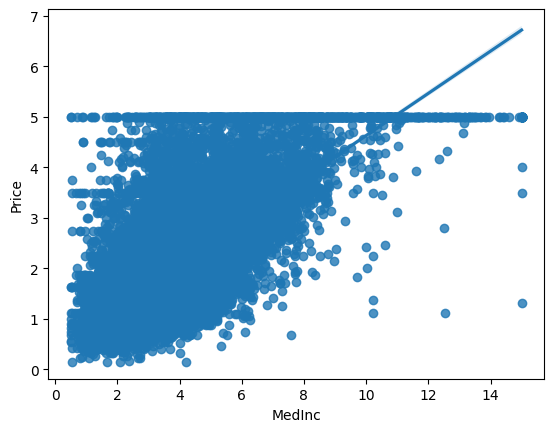

In [27]:
sns.regplot(x="MedInc", y = "Price", data = dataset)

### Training the dataset

In [28]:
#1 Create the X and Y sets
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [29]:
# 2 Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size= 0.3, random_state= 42)

In [30]:
#3 Actual training of the model

#### Interview Question 
- WHY DO YOU STANDARDIZE A DATASET IN LINEAR REGRESSION
- Standardized scaler (33rd Minute)
- We have to normalize, standardize all the data points to the same scale
- Why? Because then the gradient descent algorithm works faster and more efficiently
............
- Iternally we use Gradient descent, our main  goal is to come to the global minima
- And to come to the global minima we have to make sure that all the independent feature units should be in the same scale, so tha the convergence to the global minima will happen quickly

In [31]:
# Scaling and standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
x_train = scaler.fit_transform(x_train)

In [33]:
x_test= scaler.transform(x_test)

In [34]:
# Training the model

In [35]:
from sklearn.linear_model import LinearRegression


In [36]:
regression = LinearRegression()

In [37]:
regression.fit(x_train, y_train)

LinearRegression()

### Pediction and evaluation

In [38]:
reg_pred =regression.predict(x_test)

In [39]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [40]:
r2 = r2_score( y_test, reg_pred)
rmse = np.sqrt(mean_squared_error(y_test, reg_pred))
print(r2)
print(rmse)

0.5957702326061665
0.7284008391515452


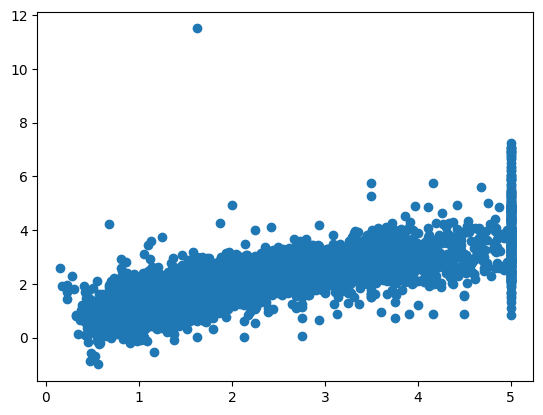

In [41]:
plt.scatter(y_test, reg_pred)

In [42]:
# Calculating the residuals / errors
residuals = y_test - reg_pred

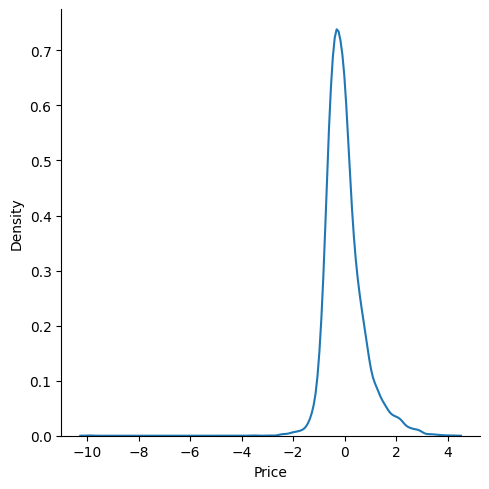

In [43]:
# Plotting he residuals
sns.displot(residuals, kind = "kde")

### Next : Prediction of New Data 55th minute

In [66]:
calif.data[0].shape

(8,)

In [62]:
calif.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [73]:
calif.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [74]:
calif.data[0].reshape(1,-1).shape

(1, 8)

In [75]:
regression.predict(calif.data[0].reshape(1,-1))

array([84.33102212])

In [77]:
# standardization
scaler.transform(calif.data[0].reshape(1,-1))

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [80]:
regression.predict(scaler.transform(calif.data[0].reshape(1,-1)))

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

### Pickling the file for Deployement

In [44]:
import pickle

In [46]:
# code for pickling
pickle.dump(regression, open('regmodel.pkl','wb'))

In [47]:
# code for unpickling
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [78]:
pickled_model.predict(scaler.transform(calif.data[0].reshape(1,-1)))

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

### Setting up GitHub
- done